In [21]:

#importing dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import time
import json


#Import API key
api_key = "f098ef8faeb290b3824f5346bff3bfbb"

In [23]:
#import citipy to determine city (latitude and longitude)
from citipy import citipy

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [24]:
# Create an empty DataFrame to store city information
cities = []
count = 0

# Make a random list of lat and lon coordinates
while count < 500:
    lat = random.randint(-90,90)
    lon = random.randint(-180,180)
    
    # If the nerest city is duplicate, it does not append to "cities" DataFrame
    if citipy.nearest_city(lat, lon) not in cities:
        cities.append(citipy.nearest_city(lat, lon))
        count = count + 1

# Print out list of cities and country code
len(cities)

500

In [26]:
# Create an empty DataFrame to store response 
city_data = []

# Save config information
url = 'http://api.openweathermap.org/data/2.5/weather'
params = {'appid': api_key,
          'q': '',
          'units': 'imperial'}

# Loop through each city and use the city name to get back the weather data using the Weather API
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.
counter=0
for index, city in enumerate(cities):
    try:
        counter=counter + 1
        params['q'] = city.city_name + ',' + city.country_code
        print(f"Weather Data #{counter}  |  {city.city_name}")
        print(f"Requested URL: {url + '?units=' + params['units'] + '&APPID=' + params['appid'] + '&q=' + city.city_name.replace(' ', '%20') + ',' + city.country_code}")
        response = req.get(url, params=params).json()
        city_data.append(response)
    except:
        print(f"weather data for {city.city_name} is not available")
# Print JSON structure
print(json.dumps(response, indent=4, sort_keys=True))


Weather Data #1  |  mago
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f098ef8faeb290b3824f5346bff3bfbb&q=mago,ru
Weather Data #2  |  rikitea
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f098ef8faeb290b3824f5346bff3bfbb&q=rikitea,pf
Weather Data #3  |  cape town
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f098ef8faeb290b3824f5346bff3bfbb&q=cape%20town,za
Weather Data #4  |  mar del plata
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f098ef8faeb290b3824f5346bff3bfbb&q=mar%20del%20plata,ar
Weather Data #5  |  ancud
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f098ef8faeb290b3824f5346bff3bfbb&q=ancud,cl
Weather Data #6  |  busselton
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f098ef8faeb290b3824f5346bff3bfbb&q=busselton,au
Weather Data #7  |  atuona
Requested URL: 

In [27]:

#collect and parse the data into a Data Frame 
city= []
clouds= []
country= []
date= []
humidity= []
lat= []
lng= []
temp= []
wind= []
for data in city_data:
    if data['cod']==200:
        city.append(data['name'])
        clouds.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        temp.append(data['main']['temp_max'])
        wind.append(data['wind']['speed'])

weather_dict = {"City": city,
                "Cloudiness": clouds,
                "Country": country,
                "Humidity": humidity,
                "Lat": lat,
                "Lng": lng,
                "Temperature (°F)": temp,
                "Wind Speed": wind}
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df=weather_data_df[["City","Country","Lat","Lng","Temperature (°F)","Humidity","Wind Speed","Cloudiness"]]



weather_data_df.head()

,City,Country,Lat,Lng,Temperature (°F),Humidity,Wind Speed,Cloudiness
0,Mago,RU,53.27,140.15,32.97,82,3.15,36
1,Rikitea,PF,-23.12,-134.97,77.25,100,5.50,0
2,Cape Town,ZA,-33.93,18.42,64.99,93,12.75,0
3,Mar del Plata,AR,-46.43,-67.52,49.44,100,9.42,92
4,Ancud,CL,-41.87,-73.83,60.80,87,5.82,90


In [29]:
# Export the City_Data into a csv
weather_data_df.to_csv("WeatherDataCities.csv", index=False)

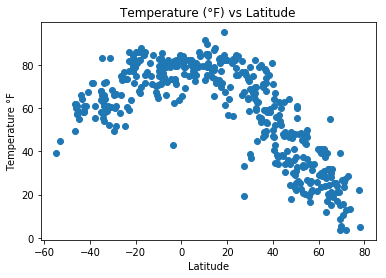

In [31]:
#Latitude Vs Temperature 
plt.scatter(weather_data_df["Lat"],weather_data_df["Temperature (°F)"],marker ="o")
plt.title("Temperature (°F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature °F")
plt.savefig("Temperature (°F) vs Latitude")
plt.show()

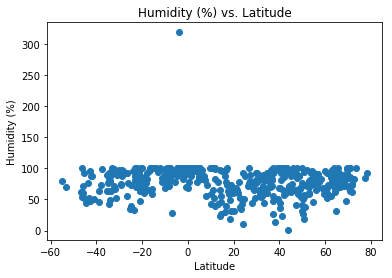

In [32]:
#Humidity Vs. Latitude
plt.scatter(weather_data_df["Lat"],weather_data_df["Humidity"],marker ="o")
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Humidity (%) vs. Latitude.png")
plt.show()

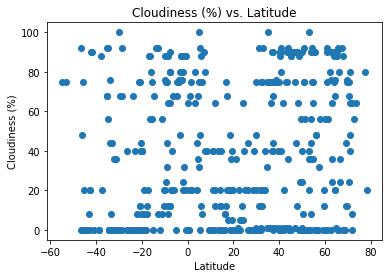

In [34]:
#Cloudiness Vs. Latitude 
plt.scatter(weather_data_df["Lat"],weather_data_df["Cloudiness"],marker ="o")
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Cloudiness (%) vs. Latitude.png")
plt.show()

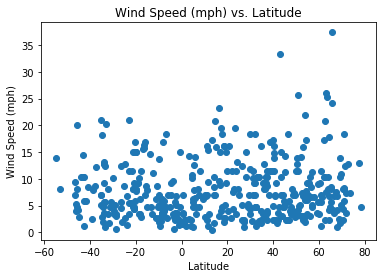

In [36]:
#Wind Speed Vs. Latitude
plt.scatter(weather_data_df["Lat"],weather_data_df["Wind Speed"],marker ="o")
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Wind Speed (mph) vs. Latitude.png")
plt.show()